## MNIST CNN
### Using a convolutional network for MNIST

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # to disable GPU

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import matplotlib.pyplot as plt

2023-02-21 22:52:07.179600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-21 22:52:07.179629: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

Meta parameters (Remember images are 28x28)

In [3]:
batch_size = 128
epochs = 10 # 10 epochs is enough with this powerful network

### Data Preparation

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# In Keras, Default usually is 'channels_last'
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28,28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28,28)
    input_shape = (1, 28,28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28,28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28,28, 1)
    input_shape = (28,28, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Network model design

In [5]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

2023-02-21 22:52:09.788526: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-21 22:52:09.788575: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: manero-ThinkPad-P52s
2023-02-21 22:52:09.788587: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: manero-ThinkPad-P52s
2023-02-21 22:52:09.788690: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-02-21 22:52:09.788732: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-02-21 22:52:09.788743: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.161.3
2023-02-21 22:52:09.789349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the fol

### Network Training

In [6]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 136s 289ms/step - loss: 0.0795 - accuracy: 0.9754 - val_loss: 0.2921 - val_accuracy: 0.8969
Epoch 2/10
469/469 [==============================] - 107s 229ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0453 - val_accuracy: 0.9868
Epoch 3/10
469/469 [==============================] - 105s 225ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0351 - val_accuracy: 0.9910
Epoch 4/10
469/469 [==============================] - 107s 228ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 5/10
469/469 [==============================] - 107s 227ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0427 - val_accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 106s 227ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0237 - val_accuracy: 0.9929
Epoch 7/10
469/469 [==============================] - 106s 226ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0457 -

### Result Analysis

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03454700857400894
Test accuracy: 0.9915000200271606


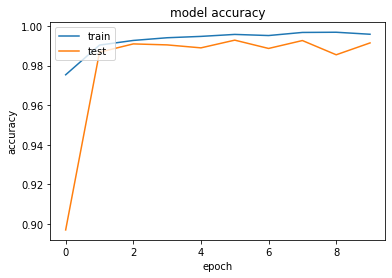

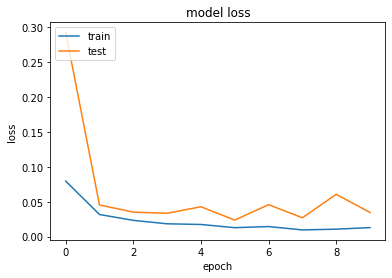

In [8]:
Analyze_training(history)

In [9]:
#EOF